## 회귀 실습 - 자전거 대여 수요 예측

### 캐글의 자전거 대여 수요 예측 경연에서 사용된 학습 데이터 세트를 이용

### 선형 회귀, 트리 기반 회귀 비교

#### https://www.kaggle.com/c/bike-sharing-demand/data

In [161]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
bike_df = pd.read_csv('bike_train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [163]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [164]:
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [165]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### 대부분의 칼럼이 int 또는 float 숫자형인데, datetime 칼럼만 object형

#### -> datetime 칼럼 가공 필요: 년,월,일,시간처럼 4개의 속성으로 분리

#### -> 문자열을 'datetime' 타입으로 변경하기: apply(pd.to_datetime) 메서드 사용

In [166]:
# 문자열을 datetime 타입으로 변경
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
# 변경 되었는지 확인해보기
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [167]:
# datetime 타입에서 년,월,일,시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)

In [168]:
# 추출한 결과 확인하기
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [169]:
bike_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [170]:
# datetime 칼럼 삭제하기
# casual + registered = count
# -> casual과 registered가 따로 필요하지 않고, 상관도가 높아 예측을 저해할 우려가 있으므로
#    두 칼럼도 같이 삭제한다.

In [171]:
# 칼럼 3개 삭제하기
bike_df.drop(columns=['datetime','casual','registered'], inplace=True)

In [172]:
# 삭제한 결과 확인하기
bike_df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


### 다양한 회귀 모델을 데이터 세트에 적용해 예측 성능 측정하기

#### 캐글에서 요구하는 성능 평가 방법은 RMSLE(Root Mean Square Log Error)

#### 사이킷런은 RMSLE를 제공하지 않아서, RMSLE를 수행하는 성능 평가 함수 만들기

In [173]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [174]:
# rmsle()에서 사이킷런의 mean_squared_log_error() 이용하면
# 오버플로(overflow) 또는 언더플로(underflow) 오류가 발생하기 쉽다.

# 따라서 log 값 변환 시 NaN 등의 이슈로 
# log()가 아닌 log1p()를 이용해 RMSLE를 계산한다.

# log1p()는 1 + log() 값으로 log 변환값에 1을 더하므로 문제를 해결할 수 있다.
# log1p()로 변환된 값은 넘파이의 expm1() 함수로 다시 원래의 스케일로 복원 가능하다.

def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_squared_error()를 이용해 RMSE 계산
def rmse(y, pred):
    return mean_squared_error(y, pred, squared=False)

# MSE, RMSE, RMSLE를 모두 계산
def evaluate_regr(y, pred):
    # MAE는 사이킷런의 mean_absolute_error()로 계산
    print(f'RMSLE: {rmsle(y, pred)}, RMSE: {rmse(y, pred)}, MAE: {mean_absolute_error(y, pred)}')

### 로그 변환, 피처 인코딩과 모델 학습/예측/평가

#### 회귀 모델을 적용하기 전에 데이터 세트에 대해 먼저 처리해야 할 사항

##### 1. 결과값이 정규분포로 되어 있는지 확인하기

##### 2. 카테고리형 회귀 모델의 경우 원-핫 인코딩으로 피처를 인코딩하기

In [175]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings

In [176]:
# RuntimeWarning 경고 메세지만 보지 않게끔 설정하기
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [177]:
x = bike_df.drop(columns=['count'])
y = bike_df['count']

In [178]:
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [179]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train, y_train)
pred = lr_reg.predict(x_test)
evaluate_regr(y_test, pred)

RMSLE: 1.164663623711179, RMSE: 140.89958867165632, MAE: 105.92444835100477


In [181]:
# 실제 Target 데이터 값인 대여 횟수(Count)를 감안하면
# 결과가 예측 오류로서는 비교적 큰 값.
# -> 실제값과 예측값의 차이를 DataFrame의 칼럼으로 만들어서
#    오류값이 가장 큰 순으로 5개만 확인해보기

In [182]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성하기
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count'] = pred
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count        diff
1618         890       322.117787  567.882213
966          884       326.704555  557.295445
3151         798       241.365876  556.634124
412          745       193.895003  551.104997
2277         813       266.977808  546.022192


In [183]:
def get_top_error_data(y_test, pred, n_tops=5):
    # DataFrame의 칼럼으로 실제 대여 횟수(count)와 예측값을 서로 비교할 수 있도록 생성하기
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    # np.round()로 반올림하기
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

get_top_error_data(y_test, pred, n_tops=5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<Axes: >

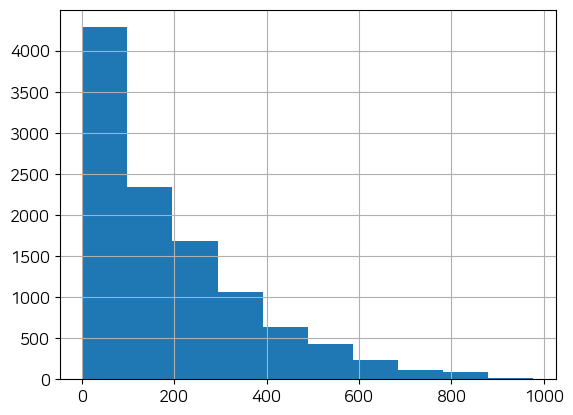

In [184]:
y.hist()

<Axes: >

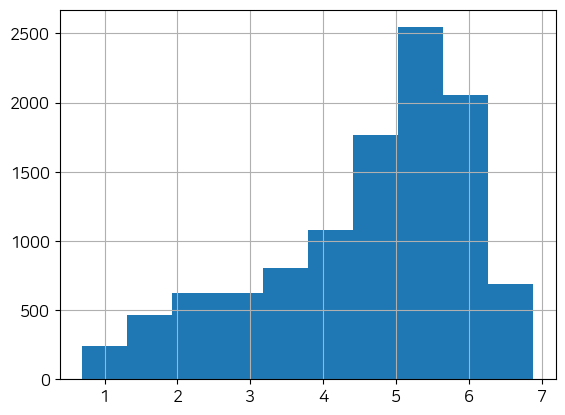

In [185]:
y_log = np.log1p(y)
y_log.hist()

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x,y_log,test_size=0.3,random_state=0)

lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
pred = lr_reg.predict(x_test)

# Numpy에서 더할 땐 p 뺄 땐 m
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp, pred_exp)
# 앞의 결과와 비교해보기
# RMSLE: 1.164663623711179, RMSE: 140.89958867165632, MAE: 105.92444835100477

RMSLE: 1.0168265982003455, RMSE: 162.5942680900459, MAE: 109.28615860077447


In [187]:
d1 = 324
d1_log = np.log1p(d1)
d1_log

5.783825182329737

In [188]:
np.expm1(d1_log)

323.99999999999994

<Axes: >

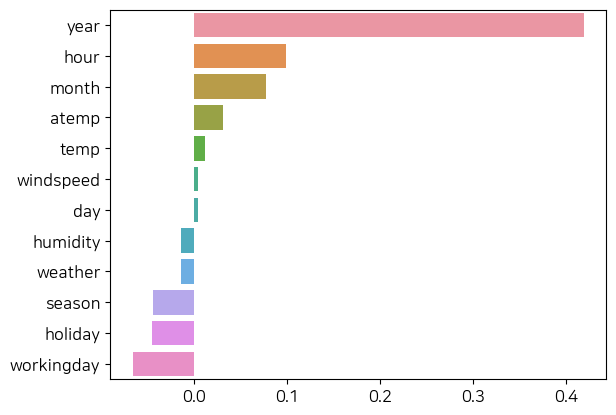

In [189]:
# 각 피처의 회귀 계수값을 시각화 해보기
coef = pd.Series(lr_reg.coef_, index = x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [190]:
bike_df.year.value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [191]:
pd.get_dummies(bike_df.year)

,2011,2012
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
10881,0,1
10882,0,1
10883,0,1
10884,0,1


In [192]:
pd.get_dummies(bike_df.month)

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,0,0,0,0,0,0,0,0,1
10882,0,0,0,0,0,0,0,0,0,0,0,1
10883,0,0,0,0,0,0,0,0,0,0,0,1
10884,0,0,0,0,0,0,0,0,0,0,0,1


In [193]:
pd.get_dummies(x, columns=['year'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,year_2011,year_2012
0,1,0,0,1,9.84,14.395,81,0.0000,1,1,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,1,1,2,1,0
3,1,0,0,1,9.84,14.395,75,0.0000,1,1,3,1,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,12,19,19,0,1
10882,4,0,1,1,14.76,17.425,57,15.0013,12,19,20,0,1
10883,4,0,1,1,13.94,15.910,61,15.0013,12,19,21,0,1
10884,4,0,1,1,13.94,17.425,61,6.0032,12,19,22,0,1


In [194]:
pd.get_dummies(x, columns=['year'], dtype=int)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,year_2011,year_2012
0,1,0,0,1,9.84,14.395,81,0.0000,1,1,0,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,1,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,1,1,2,1,0
3,1,0,0,1,9.84,14.395,75,0.0000,1,1,3,1,0
4,1,0,0,1,9.84,14.395,75,0.0000,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,12,19,19,0,1
10882,4,0,1,1,14.76,17.425,57,15.0013,12,19,20,0,1
10883,4,0,1,1,13.94,15.910,61,15.0013,12,19,21,0,1
10884,4,0,1,1,13.94,17.425,61,6.0032,12,19,22,0,1


### 원-핫 인코딩

In [195]:
x_ohe = pd.get_dummies(x, columns=['year','month','day','hour','holiday','workingday','season','weather'], dtype=int)

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x_ohe,y_log,test_size=0.3,random_state=0)

def get_model_predict(model,x_train,x_test,y_train,y_test,is_expm1=False):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('####', model.__class__.__name__, '####')
    evaluate_regr(y_test, pred)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,x_train,x_test,y_train,y_test,is_expm1=True)
# 앞의 결과와 비교해보기
# RMSLE: 1.164663623711179, RMSE: 140.89958867165632, MAE: 105.92444835100477
# RMSLE: 1.0168265982003455, RMSE: 162.5942680900459, MAE: 109.28615860077447

#### LinearRegression ####
RMSLE: 0.5896337397651216, RMSE: 97.68770675743791, MAE: 63.3820657763712
#### Ridge ####
RMSLE: 0.5901367703437238, RMSE: 98.52859077604448, MAE: 63.893352771107125
#### Lasso ####
RMSLE: 0.6347518077052988, RMSE: 113.21881019147774, MAE: 72.80270669734962


#### 원-핫 인코딩 적용 후 선형 회귀의 예측 성능이 많이 향상되었다.

In [ ]:
#### 원-핫 인코딩된 데이터 세트에서 회귀 계수가 높은 피처를 다시 시각화하기

In [ ]:
#### 원-핫 인코딩으로 피처가 늘어났으므로 회귀 계수 상위 25개 피처를 추출하기

<Axes: >

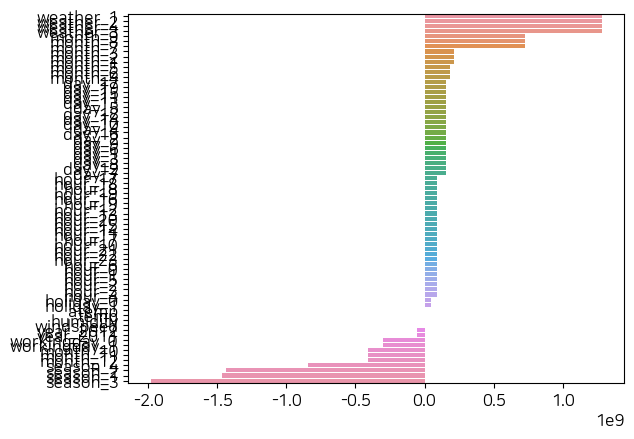

In [199]:
# 각 피처의 회귀 계수값을 시각화 해보기
coef = pd.Series(lr_reg.coef_, index = x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<Axes: >

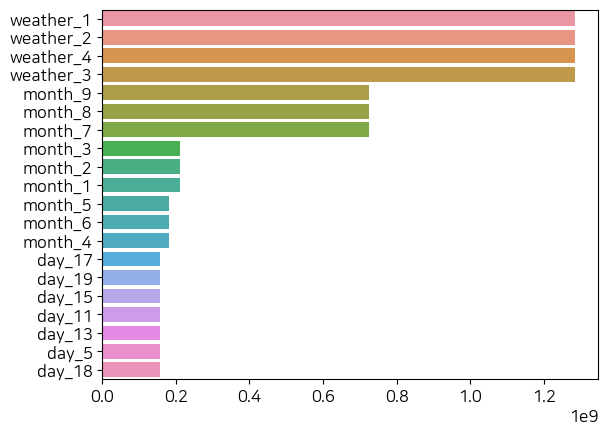

In [205]:
# 각 피처의 회귀 계수값을 시각화 해보기
coef = pd.Series(lr_reg.coef_, index = x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

<Axes: >

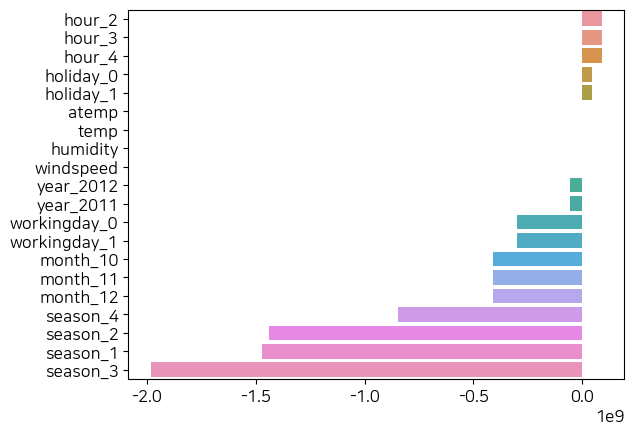

In [203]:
# 각 피처의 회귀 계수값을 시각화 해보기
coef = pd.Series(lr_reg.coef_, index = x_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[-20:]
sns.barplot(x=coef_sort.values, y=coef_sort.index)